In [1]:
import pandas as pd
import numpy as np

In [20]:
fees = pd.read_csv('Downloads/extract - fees - data analyst - .csv')
cash_request = pd.read_csv('Downloads/extract - cash request - data analyst.csv')
lexique = pd.read_excel('Downloads/Lexique - Data Analyst.xlsx')

fees.head()


(21061, 13)

In [119]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [14]:

cash_request.rename(columns={'id':'cash_request_id'}, inplace=True)

cash_request.to_csv('Downloads/extract - cash request - data analyst.csv', index=False)

In [19]:
cash_request.head()
cash_request.shape

(23970, 16)

In [16]:
left_merge = pd.merge(fees, cash_request, on='cash_request_id', how='left')

In [25]:
left_merge.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,NaN,2020-10-01 22:00:00+00,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-10 14:58:19.039748+00,NaN,2020-09-07 22:00:00+00,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,NaN,NaN,2020-11-04 22:00:00+00,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,NaN,NaN,2020-11-11 23:51:00+00,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-06 08:20:15.587318+00,19005.0,2020-10-30 11:00:00+00,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00


In [22]:
left_merge.shape


(21061, 28)

In [29]:
left_merge['created_at_x'] = pd.to_datetime(left_merge['created_at_x'])
left_merge['year'] = left_merge['created_at_x'].dt.year
left_merge['month'] = left_merge['created_at_x'].dt.month
left_merge['YYMM'] = left_merge['created_at_x'].dt.strftime('%Y-%m')
left_merge.head()



,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,year,month,YYMM
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020,9,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020,9,2020-09
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN,2020,10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN,2020,10,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020,10,2020-10


In [39]:
left_merge.groupby(by = 'type').size()


type
incident            2196
instant_payment    11099
postpone            7766
dtype: int64

In [97]:
filtered_df = left_merge[left_merge['type'] != 'incident']


In [98]:
monthly_usage = filtered_df.groupby(['YYMM', 'transfer_type']).agg(monthly_usage = ('created_at_x','count'))
print(monthly_usage)


                       monthly_usage
YYMM    transfer_type               
2020-05 regular                   16
2020-06 regular                  762
2020-07 instant                  114
        regular                 1264
2020-08 instant                 1988
        regular                  584
2020-09 instant                 3792
        regular                  243
2020-10 instant                 9661
        regular                  180
2020-11 instant                  252
        regular                    5


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YYMM', ylabel='monthly_usage'>

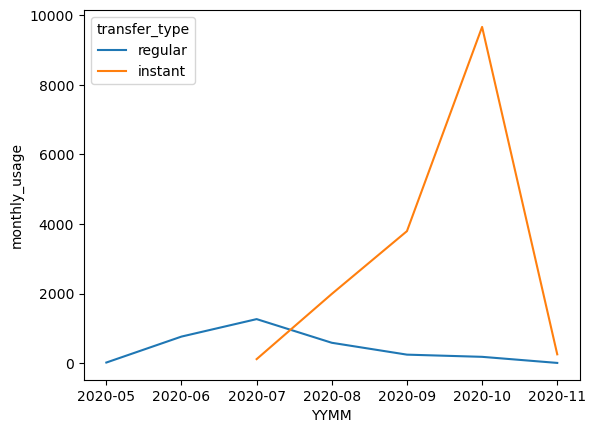

In [49]:
sns.lineplot(data=monthly_usage, x='YYMM', y='monthly_usage', hue='transfer_type')


C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


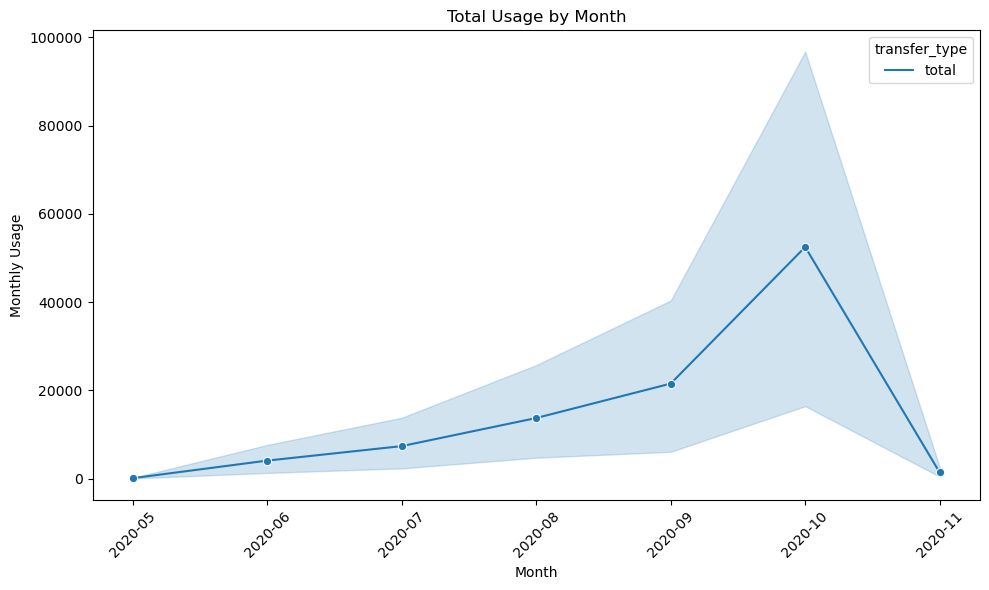

In [56]:
total_usage = monthly_usage.groupby('YYMM')['monthly_usage'].sum().reset_index()
total_usage['transfer_type'] = 'total'
monthly_usage = pd.concat([monthly_usage, total_usage], ignore_index=True)


plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_usage, x='YYMM', y='monthly_usage', hue='transfer_type', marker='o')

plt.title('Total Usage by Month')
plt.xlabel('Month')
plt.ylabel('Monthly Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
incedents = left_merge[left_merge['type'] == 'incident']
incident_count = incedents.shape[0]

In [64]:
incident_ratio = (incedents.shape[0] / left_merge['type'].count())*100
print('% ', incident_ratio)

%  10.42685532500831


In [91]:
incident_ratio_by_month = left_merge.groupby('YYMM')['type'].apply(lambda x: (x == 'incident').sum() / x.count()).reset_index(name='incident_ratio')
print(incident_ratio_by_month)


      YYMM  incident_ratio
0  2020-05        0.000000
1  2020-06        0.009103
2  2020-07        0.148857
3  2020-08        0.155963
4  2020-09        0.117454
5  2020-10        0.085919
6  2020-11        0.037453


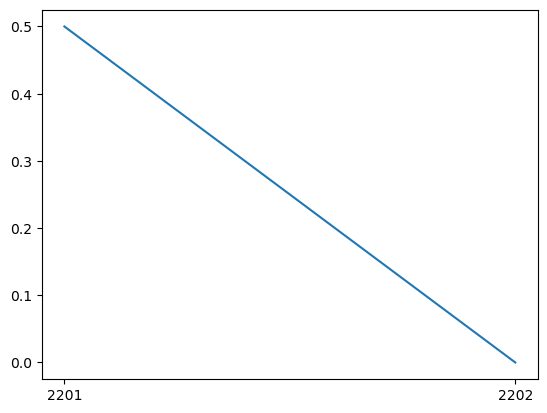

In [96]:
plt.plot(incident_ratio_by_month['YYMM'], incident_ratio_by_month['incident_ratio'])

In [101]:
 df_filtered = left_merge[left_merge['status_x'] != 'rejected']

 revenue_by_month = df_filtered.groupby('YYMM')['total_amount'].sum().reset_index()

# Print the result
print(revenue_by_month)


      YYMM  total_amount
0  2020-05          80.0
1  2020-06        3835.0
2  2020-07        7965.0
3  2020-08       14410.0
4  2020-09       21435.0
5  2020-10       50330.0
6  2020-11        1285.0


C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


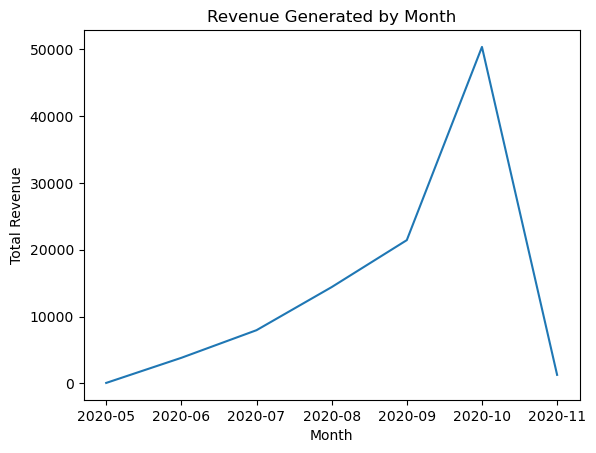

In [105]:
sns.lineplot(data=revenue_by_month, x='YYMM', y='total_amount')

plt.title('Revenue Generated by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

plt.show()

In [106]:
revenues_by_transfer_type = left_merge.groupby('transfer_type')['total_amount'].sum().reset_index()
share_of_values = left_merge['transfer_type'].value_counts(normalize=True).reset_index()
share_of_values.columns = ['transfer_type', 'share']
print(revenues_by_transfer_type)
print("\nShare of values for each transfer type:")
print(share_of_values)

  transfer_type  total_amount
0       instant       83490.0
1       regular       21800.0

Share of values for each transfer type:
  transfer_type     share
0       instant  0.792943
1       regular  0.207057


In [121]:
print("\nShare of revenue for each transfer type:")
revenues_by_transfer_type = left_merge.groupby('transfer_type')['total_amount'].sum()
share_of_values = left_merge['transfer_type'].value_counts()
share_of_values.columns = ['transfer_type', 'share']
print(revenues_by_transfer_type)
print("\nShare of values for each transfer type:")
print(share_of_values)


Share of revenue for each transfer type:
transfer_type
instant    83490.0
regular    21800.0
Name: total_amount, dtype: float64

Share of values for each transfer type:
transfer_type
instant    16697
regular     4360
Name: count, dtype: int64


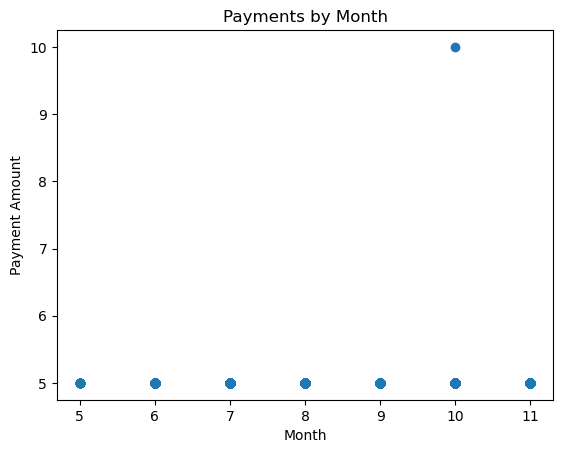

In [118]:
plt.scatter(left_merge['month'], left_merge['total_amount'])
plt.title('Payments by Month')
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.show()

In [120]:
left_merge.to_csv('mered_data.csv', index=False)